## Accidents predictions  in USA: Linear Regression & Supervised Regression Models

In [185]:
import pandas as pd 
import seaborn as sns 
from sklearn.linear_model import LinearRegression

In [186]:
df_cars = sns.load_dataset(name = "car_crashes", index_col = "abbrev")
df_crashes = df_cars[["alcohol", "total"]]
df_crashes.rename({'total': 'accidents'}, axis=1, inplace=True)

C:\Users\alexm\AppData\Local\Temp\ipykernel_22488\1705230467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crashes.rename({'total': 'accidents'}, axis=1, inplace=True)


In [187]:
df_crashes.head()

,alcohol,accidents
abbrev,,
AL,5.640,18.8
AK,4.525,18.1
AZ,5.208,18.6
AR,5.824,22.4
CA,3.360,12.0


In [188]:
model = LinearRegression()

In [189]:
features = df_crashes[["alcohol"]]
target = df_crashes[["accidents"]]

In [190]:
model.fit(X= features, y = target)

LinearRegression()

In [191]:
model.predict(X= features)

array([[17.32111171],
       [15.05486718],
       [16.44306899],
       [17.69509287],
       [12.68699734],
       [13.59756016],
       [13.76016066],
       [15.73575679],
       [ 9.0955587 ],
       [16.40851638],
       [13.78455074],
       [20.44100889],
       [14.87600663],
       [14.70324359],
       [14.40446516],
       [13.8353634 ],
       [14.54064309],
       [15.86177218],
       [19.6076813 ],
       [15.06502971],
       [13.98780137],
       [11.69106925],
       [13.88211104],
       [11.5162737 ],
       [16.94713055],
       [16.98371566],
       [24.99585551],
       [16.45729653],
       [15.41868581],
       [12.93089809],
       [12.23171592],
       [15.95526747],
       [13.10772614],
       [16.44306899],
       [26.26007443],
       [15.60161138],
       [17.58737003],
       [12.62195713],
       [17.32517672],
       [14.43088774],
       [25.77430543],
       [18.86988151],
       [17.3515993 ],
       [20.84141263],
       [ 9.53254755],
       [14

In [192]:
df_crashes["pred_lr"] = model.predict(X = features)

C:\Users\alexm\AppData\Local\Temp\ipykernel_22488\1463126921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crashes["pred_lr"] = model.predict(X = features)


In [193]:
df_crashes.head(10)

,alcohol,accidents,pred_lr
abbrev,,,
AL,5.640,18.8,17.321112
AK,4.525,18.1,15.054867
AZ,5.208,18.6,16.443069
AR,5.824,22.4,17.695093
CA,3.360,12.0,12.686997
CO,3.808,13.6,13.597560
CT,3.888,10.8,13.760161
DE,4.860,16.2,15.735757
DC,1.593,5.9,9.095559


### Model visualzation 

In [194]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Car crasehs VS alcohol consumption in US')

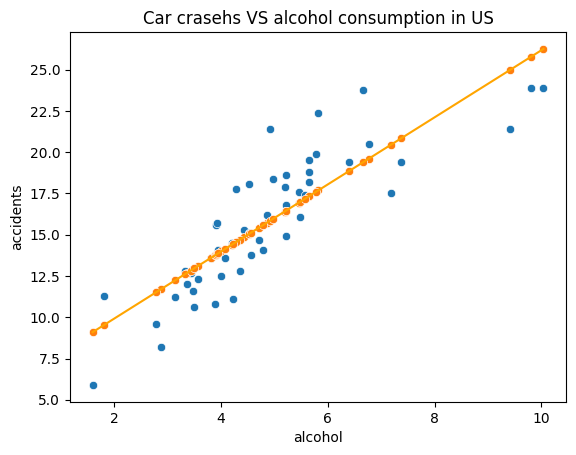

In [195]:
sns.scatterplot(x = "alcohol", y = "accidents", data = df_crashes )
sns.scatterplot(x = "alcohol", y = "pred_lr", data = df_crashes)
sns.lineplot(x = "alcohol", y = "pred_lr", data = df_crashes,color = "orange" )
plt.title("Car crasehs VS alcohol consumption in the US")

In [196]:
model.score(X = features, y = target)

0.7269492966665405

In [197]:
# R 2 = 1 − sum squared regression (SSR) / total sum of squares (SST);  = 1 − ∑ ( y i − y i ^ ) 2  / ∑ ( y i − y ¯ ) 2 .

In [198]:
# The 72.69% of variance in the car accidents can be explained by the alcohol. 

### Model interpretation 

In [199]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[2.0325063]]),
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': array([5.85777615])}

In [200]:
# accidents = 5.87 + 2.03 * alcohol;  for every unit of alcohol the number of accidents will increase by 2.032. 

## Random Forest 

In [201]:
from sklearn.ensemble import RandomForestRegressor

In [202]:
model_rf = RandomForestRegressor()

In [203]:
model_rf.fit(X = features, y = target)

C:\Users\alexm\AppData\Local\Temp\ipykernel_22488\2898387981.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X = features, y = target)


RandomForestRegressor()

In [204]:
model_rf.predict(X= features)

array([18.636 , 16.718 , 17.5124, 21.283 , 12.226 , 13.259 , 12.475 ,
       16.971 ,  7.916 , 17.8081, 14.539 , 18.371 , 15.021 , 14.265 ,
       13.938 , 15.066 , 15.806 , 19.743 , 21.111 , 15.548 , 12.959 ,
        8.919 , 14.428 ,  9.479 , 17.362 , 16.732 , 21.991 , 16.0568,
       14.502 , 11.561 , 11.55  , 18.697 , 11.881 , 17.5124, 23.341 ,
       14.726 , 20.308 , 12.53  , 18.396 , 12.596 , 23.341 , 20.694 ,
       18.945 , 19.207 ,  9.968 , 13.326 , 12.29  , 11.191 , 22.662 ,
       14.305 , 17.825 ])

In [205]:
df_crashes["pred_rf"] = model_rf.predict(X= features)

C:\Users\alexm\AppData\Local\Temp\ipykernel_22488\3950224674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crashes["pred_rf"] = model_rf.predict(X= features)


In [206]:
df_crashes.head(10)

,alcohol,accidents,pred_lr,pred_rf
abbrev,,,,
AL,5.640,18.8,17.321112,18.6360
AK,4.525,18.1,15.054867,16.7180
AZ,5.208,18.6,16.443069,17.5124
AR,5.824,22.4,17.695093,21.2830
CA,3.360,12.0,12.686997,12.2260
CO,3.808,13.6,13.597560,13.2590
CT,3.888,10.8,13.760161,12.4750
DE,4.860,16.2,15.735757,16.9710
DC,1.593,5.9,9.095559,7.9160


In [207]:
model_rf.score(X= features, y = target)

0.9556149809385877

### Support Vector Machines

In [208]:
from sklearn.svm import SVR

In [209]:
model_sv = SVR()

In [210]:
model_sv.fit(X= features, y = target)

C:\Users\alexm\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [211]:
model_sv.predict(X= features)

array([18.29570777, 15.18462721, 17.2224187 , 18.6633175 , 12.12434781,
       13.10691581, 13.31612684, 16.21131216, 12.66062465, 17.17537208,
       13.34820949, 19.38920329, 14.91415215, 14.65467023, 14.2131504 ,
       13.41560202, 14.41299448, 16.39752499, 19.4896662 , 15.20002787,
       13.62200798, 11.5390483 , 13.47824339, 11.49818909, 17.87053595,
       17.9144274 , 19.60736085, 17.24170425, 15.73585463, 12.35136579,
       11.784815  , 16.53431108, 12.53373232, 17.2224187 , 19.4773929 ,
       16.01115736, 18.56379706, 12.06891287, 18.30002795, 14.25171609,
       19.59597679, 19.37950461, 18.32794218, 19.29994413, 12.26345665,
       13.84847453, 12.25128025, 12.38791686, 19.48212198, 15.27397732,
       18.1357253 ])

In [212]:
df_crashes["pred_sv"] = model_sv.predict(X=features)

C:\Users\alexm\AppData\Local\Temp\ipykernel_22488\3777959490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crashes["pred_sv"] = model_sv.predict(X=features)


In [213]:
df_crashes.head()

,alcohol,accidents,pred_lr,pred_rf,pred_sv
abbrev,,,,,
AL,5.640,18.8,17.321112,18.6360,18.295708
AK,4.525,18.1,15.054867,16.7180,15.184627
AZ,5.208,18.6,16.443069,17.5124,17.222419
AR,5.824,22.4,17.695093,21.2830,18.663318
CA,3.360,12.0,12.686997,12.2260,12.124348


In [214]:
model_sv.score(X= features, y = target)

0.7083438012012768

In [215]:
dict_scores = {}

In [216]:
dict_scores["lr"] = model.score(X= features, y = target)
dict_scores["rf"] = model_rf.score(X= features, y = target)
dict_scores["sv"] = model_sv.score(X= features, y = target)

In [217]:
pd.Series(dict_scores).sort_values(ascending = False)

rf    0.955615
lr    0.726949
sv    0.708344
dtype: float64

### Models visualization 

In [218]:
df_crashes.head(10)

,alcohol,accidents,pred_lr,pred_rf,pred_sv
abbrev,,,,,
AL,5.640,18.8,17.321112,18.6360,18.295708
AK,4.525,18.1,15.054867,16.7180,15.184627
AZ,5.208,18.6,16.443069,17.5124,17.222419
AR,5.824,22.4,17.695093,21.2830,18.663318
CA,3.360,12.0,12.686997,12.2260,12.124348
CO,3.808,13.6,13.597560,13.2590,13.106916
CT,3.888,10.8,13.760161,12.4750,13.316127
DE,4.860,16.2,15.735757,16.9710,16.211312
DC,1.593,5.9,9.095559,7.9160,12.660625


Text(0.5, 1.0, 'Linear Regression , Random Forest and SVM predictions on car accidents based on alcohol')

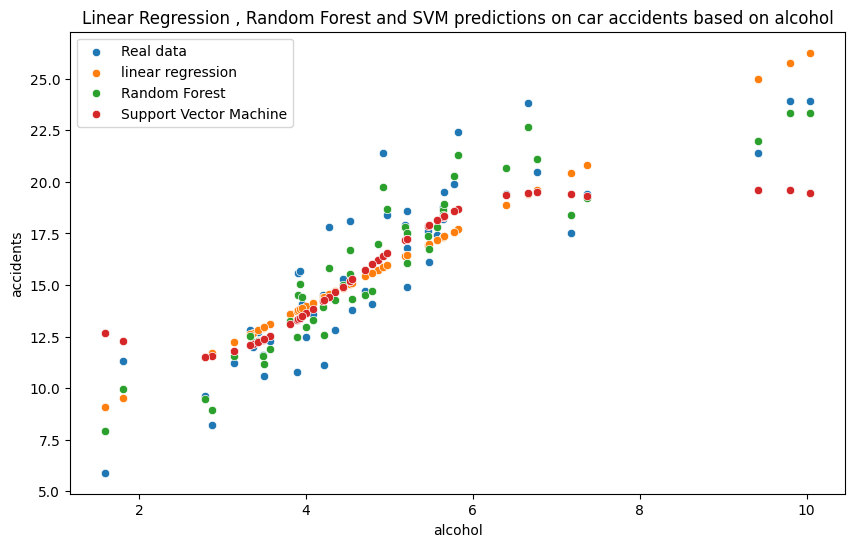

In [228]:
fig, ax = plt.subplots(figsize = (10,6))
sns.scatterplot(x = "alcohol", y = "accidents", data = df_crashes, label = "Real data")
sns.scatterplot(x = "alcohol", y = "pred_lr", data = df_crashes, label = "linear regression")
sns.scatterplot(x = "alcohol", y = "pred_rf", data = df_crashes, label = "Random Forest")
sns.scatterplot(x = "alcohol", y = "pred_sv", data = df_crashes, label = "Support Vector Machine")
plt.title("Linear Regression , Random Forest and SVM predictions on car accidents based on alcohol")